### Read a netcdf formated smi par file and plot on a world map

this notebook reads and maps par in standard mapped image format

https://oceancolor.gsfc.nasa.gov/docs/technical/ocean_level-3_smi_products.pdf

In [7]:
from netCDF4 import Dataset
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.basemap import Basemap
from e582utils.data_read import download
import warnings
warnings.filterwarnings("ignore")

l3file='A2007008.L3m_DAY_PAR_par_9km.nc'
download(l3file)


A2007008.L3m_DAY_PAR_par_9km.nc already exists
and is 14345758 bytes
will not overwrite



In [8]:
!ncdump -h A2007008.L3m_DAY_PAR_par_9km.nc

netcdf A2007008.L3m_DAY_PAR_par_9km {
dimensions:
	lat = 2160 ;
	lon = 4320 ;
	rgb = 3 ;
	eightbitcolor = 256 ;
variables:
	float par(lat, lon) ;
		par:long_name = "Photosynthetically Available Radiation, R. Frouin" ;
		par:units = "einstein m^-2 day^-1" ;
		par:standard_name = "surface_downwelling_photosynthetic_photon_flux_in_air" ;
		par:_FillValue = -32767.f ;
		par:valid_min = 0.f ;
		par:valid_max = 150.f ;
		par:display_scale = "linear" ;
		par:display_min = 0. ;
		par:display_max = 76.2 ;
		par:scale_factor = 1.f ;
		par:add_offset = 0.f ;
		par:reference = "Frouin, R., Ligner, D.W., and Gautier, C., 1989: A Simple analytical formula to compute clear sky total and photosynthetically available solar irradiance at the ocean surface. J. Geophys. Res., 94, 9731-9742." ;
	float lat(lat) ;
		lat:long_name = "Latitude" ;
		lat:units = "degree_north" ;
		lat:_FillValue = -32767.f ;
		lat:valid_min = -90.f ;
		lat:valid_max = 90.f ;
	float lon(lon) ;
		lon:long_name = "Longitude" ;
		lo

#### Extract the variables and the _FillValue and replace missing data with np.nan

See http://unidata.github.io/netcdf4-python/

In [2]:
with Dataset(l3file,'r') as ncdat:
    ncdat.set_auto_mask(False)
    par=ncdat.variables['par'][...]
    lat=ncdat.variables['lat'][...]
    lon=ncdat.variables['lon'][...]
    fill_value=ncdat.variables['par']._FillValue
hit= par == fill_value
par[hit] = np.nan

#### set up the palette

In [3]:
cmap=matplotlib.cm.YlGn_r  #see http://wiki.scipy.org/Cookbook/Matplotlib/Show_colormaps
cmap.set_over('r')
cmap.set_under('0.85')
cmap.set_bad('0.75') #75% grey
vmin= 0
vmax= 100
the_norm=matplotlib.colors.Normalize(vmin=vmin,vmax=vmax,clip=False)

#### plot using https://nsidc.org/data/atlas/epsg_4326.html

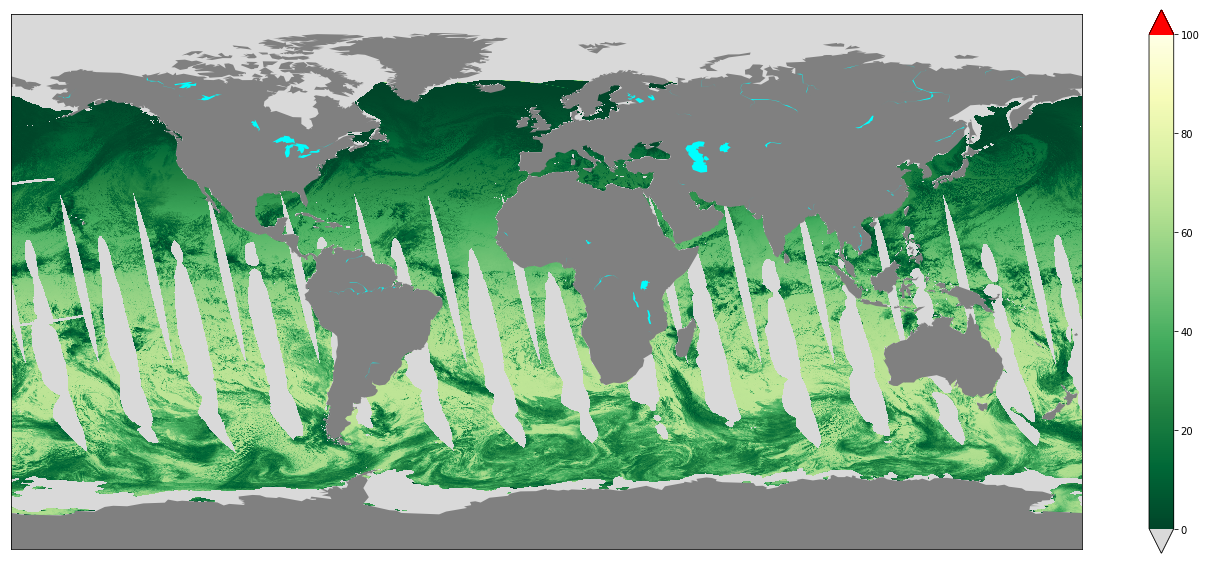

In [4]:
%matplotlib inline
bmap=Basemap(epsg=4326)
lonvals,latvals = np.meshgrid(lon,lat)
fig, ax = plt.subplots(1,1,figsize=(24,20))
xvals,yvals=bmap(lonvals,latvals)
cs=bmap.pcolormesh(xvals,yvals,par,cmap=cmap,norm=the_norm)
bmap.fillcontinents(color='grey',lake_color='cyan');
colorbar=fig.colorbar(cs, shrink=0.5, pad=0.05,extend='both')